## W200 Project_2: Relationship Between Inequality and GDP

What is the relationship between a nation's GDP and its income inequality as measured by the gini coefficient?  What relationship do we see between the 10 year trend in the gini coefficient and the 10 year Real GDP growth rate?

In [194]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

%matplotlib inline
print(np.__version__)
print(pd.__version__)
print(sns.__version__)

1.13.1
0.20.3
0.7.1


In [195]:
gini_original = pd.read_csv("WIID_06MAY2020.csv")
gini_new = pd.read_csv("final_gini_table_with_new_variables.csv")

In [196]:
gini_original['year'] = pd.to_datetime(gini_original['year'], format = '%Y')
gini_new['year'] = pd.to_datetime(gini_new['year'], format = '%Y-%m-%d')

In [197]:
merger = gini_original[['country', 'year', 'population']]
new_set = gini_new.merge(merger, how = 'left', on = ['country','year'])
new_set['GDP_per_capita'] = new_set['gdp'] / new_set['population']
new_set
# new_set[new_set.country == 'United States']


,Unnamed: 0,country,code3,code2,region,sub_region,gini_trend,country_class,year,gini,trade_ratio,gdp,trade,population,GDP_per_capita
0,0,Afghanistan,AFG,AF,Asia,Southern Asia,-0.40,developing,2009-01-01,NaN,49.663426,1.243909e+10,6.177677e+09,NaN,NaN
1,1,Armenia,ARM,AM,Asia,Western Asia,0.10,developing,2009-01-01,31.76,57.274236,8.647937e+09,4.953040e+09,2888584.0,2993.832531
2,1,Armenia,ARM,AM,Asia,Western Asia,0.10,developing,2009-01-01,31.76,57.274236,8.647937e+09,4.953040e+09,2888584.0,2993.832531
3,1,Armenia,ARM,AM,Asia,Western Asia,0.10,developing,2009-01-01,31.76,57.274236,8.647937e+09,4.953040e+09,2888094.0,2994.340471
4,2,Australia,AUS,AU,Oceania,Australia and New Zealand,0.24,developed,2009-01-01,NaN,45.797904,9.278052e+11,4.249153e+11,NaN,NaN
5,3,Austria,AUT,AT,Europe,Western Europe,-0.78,developed,2009-01-01,34.48,87.062231,4.001723e+11,3.483989e+11,8372658.0,47795.132425
6,3,Austria,AUT,AT,Europe,Western Europe,-0.78,developed,2009-01-01,34.48,87.062231,4.001723e+11,3.483989e+11,8370038.0,47810.093319
7,3,Austria,AUT,AT,Europe,Western Europe,-0.78,developed,2009-01-01,34.48,87.062231,4.001723e+11,3.483989e+11,8370038.0,47810.093319
8,3,Austria,AUT,AT,Europe,Western Europe,-0.78,developed,2009-01-01,34.48,87.062231,4.001723e+11,3.483989e+11,8370038.0,47810.093319
9,3,Austria,AUT,AT,Europe,Western Europe,-0.78,developed,2009-01-01,34.48,87.062231,4.001723e+11,3.483989e+11,8372658.0,47795.132425


In [198]:
# Create a table with the most recent gini & GDP per Capita figure for each country

# Create an aggregate function to pass through
agg_functions = {'gini_trend': 'mean', 'gini': 'mean', 'gdp': 'mean', 'population': 'mean', 'GDP_per_capita': 'mean'}

# Remove columns containing null values. This ensures you have the columns that have both
# a gini values as well as a GDP value
new_set = new_set[new_set.notnull().all(1)]

# Groupby the country and year and pass through the aggregate functions. The years default to
# sorting themselves
new_set = new_set.groupby(['country', 'year']).agg(agg_functions)

# Reset the index. 
new_set.reset_index(level = 1, inplace = True)

# Pull the last row, the values are already sorted by year
new_set = new_set.groupby('country').last()
new_set

gini_gdp_df = new_set[['gini', 'GDP_per_capita']]
# DataFrame containing the latest gini and GDP_per_capita from 2008+
gini_gdp_df

,gini,GDP_per_capita
country,,
Afghanistan,31.00,556.306478
Armenia,33.62,3914.527854
Australia,33.00,49823.247021
Austria,26.80,51230.304108
Bangladesh,40.34,1401.564464
Barbados,32.00,17391.668908
Belarus,25.44,5791.031316
Belgium,25.60,47263.317194
Benin,47.76,1076.796698


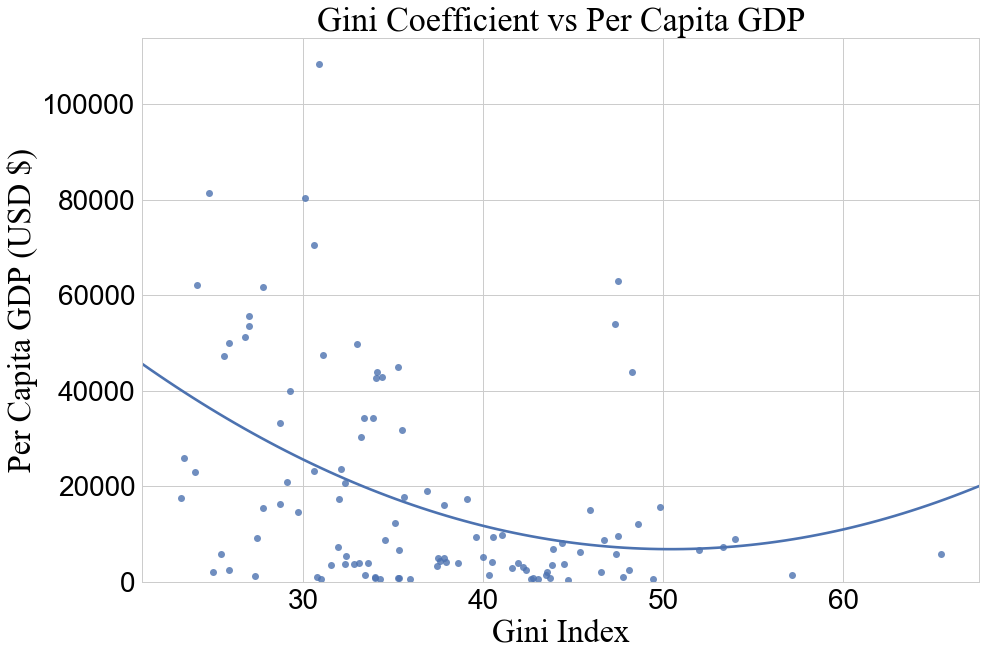

In [199]:
# Now let's make a scatter plot!
fig = plt.figure(figsize=(15,10))
ax = sns.regplot(x = gini_gdp_df.gini, y = gini_gdp_df.GDP_per_capita, order = 2, ci = None)

ax.set_title("Gini Coefficient vs Per Capita GDP", fontdict={'fontsize':34}, color="k",
            fontname="Times New Roman")
plt.xlabel("Gini Index", fontsize = 32, color="k", fontname="Times New Roman")
plt.ylabel("Per Capita GDP (USD $)", fontsize = 32, color="k", fontname="Times New Roman")
plt.xticks(fontsize=28, color="grey")
plt.yticks(fontsize=28, color="grey")
plt.tick_params(color='grey', labelcolor='k')
sns.set(style = 'ticks')
ax.set(ylim = 0)
pass

In [200]:
new_set.dtypes

year              datetime64[ns]
gini_trend               float64
gini                     float64
gdp                      float64
population               float64
GDP_per_capita           float64
dtype: object

## Analyze the real gdp growth rates with the gini trend

In [335]:
# Note: As part of pre-processing the Real GDP Growth New file contains the rate of real gdp change over 10 years
# already calculated as bf_gdp_growth_rate
real_gdp_growth = pd.read_csv("Real_GDP_Growth_new.csv")
real_gdp_growth.set_index(['country'], inplace = True)
real_gdp_growth = real_gdp_growth.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)
real_gdp_growth

,code3,code2,region,sub_region,gini_trend,country_class,year,gini,trade_ratio,gdp,trade,Real_GDP_growth,bf_gdp_growth_rate
country,,,,,,,,,,,,,
Afghanistan,AFG,AF,Asia,Southern Asia,-0.40,developing,2009-01-01,NaN,49.663426,1.243909e+10,6.177677e+09,20.6,-1.070000
Armenia,ARM,AM,Asia,Western Asia,0.10,developing,2009-01-01,31.76,57.274236,8.647937e+09,4.953040e+09,-14.1,0.596364
Australia,AUS,AU,Oceania,Australia and New Zealand,0.24,developed,2009-01-01,NaN,45.797904,9.278052e+11,4.249153e+11,1.9,0.012727
Austria,AUT,AT,Europe,Western Europe,-0.78,developed,2009-01-01,34.48,87.062231,4.001723e+11,3.483989e+11,-3.8,0.243636
Bangladesh,BGD,BD,Asia,Southern Asia,0.23,developing,2009-01-01,NaN,40.092796,1.024778e+11,4.108621e+10,5.3,0.235455
Barbados,BRB,BB,Americas,Caribbean,-1.86,developing,2009-01-01,NaN,89.384604,4.465500e+09,3.991470e+09,-5.1,0.334545
Belarus,BLR,BY,Europe,Eastern Europe,-0.35,developing,2009-01-01,27.69,108.635645,5.087408e+10,5.526738e+10,0.2,-0.689091
Belgium,BEL,BE,Europe,Western Europe,-0.80,developed,2009-01-01,32.29,135.406041,4.813459e+11,6.517715e+11,-2.0,0.170909
Benin,BEN,BJ,Africa,Western Africa,1.44,developing,2009-01-01,NaN,44.702629,9.699587e+09,4.335970e+09,2.3,0.230909


#### Create plot of GDP 10 year rate vs gini 10 year rate

In [336]:
# Create df to plot
gini_gdp_rate = real_gdp_growth[['gini_trend', 'bf_gdp_growth_rate']]

# Since we have 10 year trend values for the gdp growth rate and gini trend, we can remove duplicates
gini_gdp_rate = gini_gdp_rate.drop_duplicates()

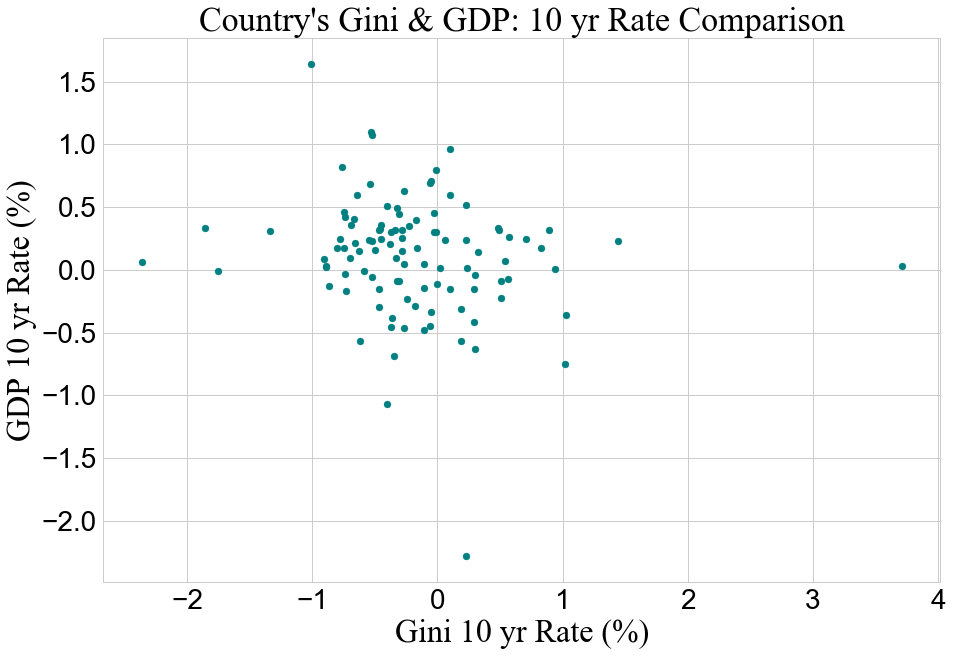

In [337]:
# Time to create our scatter plot
fig = plt.figure(figsize=(15,10))

# Create a scatterplot using one of our team's colors for the plots
plt.scatter(gini_gdp_rate.gini_trend, gini_gdp_rate.bf_gdp_growth_rate, c = '#008080')

# Create the title and change the font and font size
plt.title("Country's Gini & GDP: 10 yr Rate Comparison", fontdict={'fontsize':34}, color="k",
            fontname="Times New Roman")

# Update the x and y labels
plt.xlabel("Gini 10 yr Rate (%)", fontsize = 32, color="k", fontname="Times New Roman")
plt.ylabel("GDP 10 yr Rate (%)", fontsize = 32, color="k", fontname="Times New Roman")

# Update the tick marks
plt.xticks(fontsize=28, color="grey")
plt.yticks(fontsize=28, color="grey")
plt.tick_params(color='grey', labelcolor='k')

# Update the background style
sns.set(style = 'whitegrid')

pass

In [338]:
# Check Correlation
gini_gdp_rate.corr()

,gini_trend,bf_gdp_growth_rate
gini_trend,1.000000,-0.169896
bf_gdp_growth_rate,-0.169896,1.000000


In [339]:
# How many countries do we see with decreasing gini and increasing Real GDP Growth

def trends(row):
    # Capture if gini is increasing and real gdp growth is increasing
    if row['gini_trend'] >= 0 and row['bf_gdp_growth_rate'] >= 0:
        return 'Inequality Increasing & Real GDP Increasing'
    
    # Capture if gini is decreasing and real gdp growth is increasing    
    if row['gini_trend'] <= 0 and row['bf_gdp_growth_rate'] >= 0:
        return 'Inequality Decreasing & Real GDP Increasing'
    
    # Capture if gini is increasing and real gdp growth is decreasing    
    if row['gini_trend'] >= 0 and row['bf_gdp_growth_rate'] <= 0:
        return 'Inequality Increasing & Real GDP Decreasing'
    
    # Capture if gini is decreasing and real gdp growth is increasing    
    if row['gini_trend'] <= 0 and row['bf_gdp_growth_rate'] <= 0:
        return 'Inequality Decreasing & Real GDP Decreasing'
    return 'Other'

gini_gdp_rate['trend_label'] = gini_gdp_rate.apply(lambda row: trends(row), axis=1)
gini_gdp_rate

,gini_trend,bf_gdp_growth_rate,trend_label
country,,,
Afghanistan,-0.40,-1.070000,Inequality Decreasing & Real GDP Decreasing
Armenia,0.10,0.596364,Inequality Increasing & Real GDP Increasing
Australia,0.24,0.012727,Inequality Increasing & Real GDP Increasing
Austria,-0.78,0.243636,Inequality Decreasing & Real GDP Increasing
Bangladesh,0.23,0.235455,Inequality Increasing & Real GDP Increasing
Barbados,-1.86,0.334545,Inequality Decreasing & Real GDP Increasing
Belarus,-0.35,-0.689091,Inequality Decreasing & Real GDP Decreasing
Belgium,-0.80,0.170909,Inequality Decreasing & Real GDP Increasing
Benin,1.44,0.230909,Inequality Increasing & Real GDP Increasing


In [340]:
# real_gdp_growth = pd.read_csv("Real_GDP_Growth_new.csv")
# real_gdp_growth.set_index(['country'], inplace = True)
# real_gdp_growth = real_gdp_growth.drop(['Unnamed: 0', 'Unnamed: 0.1'], axis = 1)

# real_gdp_growth['trend_label'] = real_gdp_growth.apply(lambda row: trends(row), axis=1)

# real_gdp_growth = real_gdp_growth.groupby(['region', 'trend_label']).agg('mean')
# real_gdp_growth

In [341]:
# Let's figure out how best to plot this new information

# Aggregate our four labels for the different trend types
gini_gdp_rate_plot = gini_gdp_rate.groupby('trend_label').agg('count')

In [342]:
# Remove one of the columns. Since we took counts, it doesn't matter which we remove
gini_gdp_rate_plot = gini_gdp_rate_plot['gini_trend']
gini_gdp_rate_plot = gini_gdp_rate_plot.to_frame()

In [343]:
gini_gdp_rate_plot = gini_gdp_rate_plot.reset_index()
gini_gdp_rate_plot = gini_gdp_rate_plot.rename(columns = {'gini_trend': 'trend'})
gini_gdp_rate_plot1 = gini_gdp_rate_plot.drop(4, axis = 0)
gini_gdp_rate_plot1

,trend_label,trend
0,Inequality Decreasing & Real GDP Decreasing,22
1,Inequality Decreasing & Real GDP Increasing,51
2,Inequality Increasing & Real GDP Decreasing,14
3,Inequality Increasing & Real GDP Increasing,18


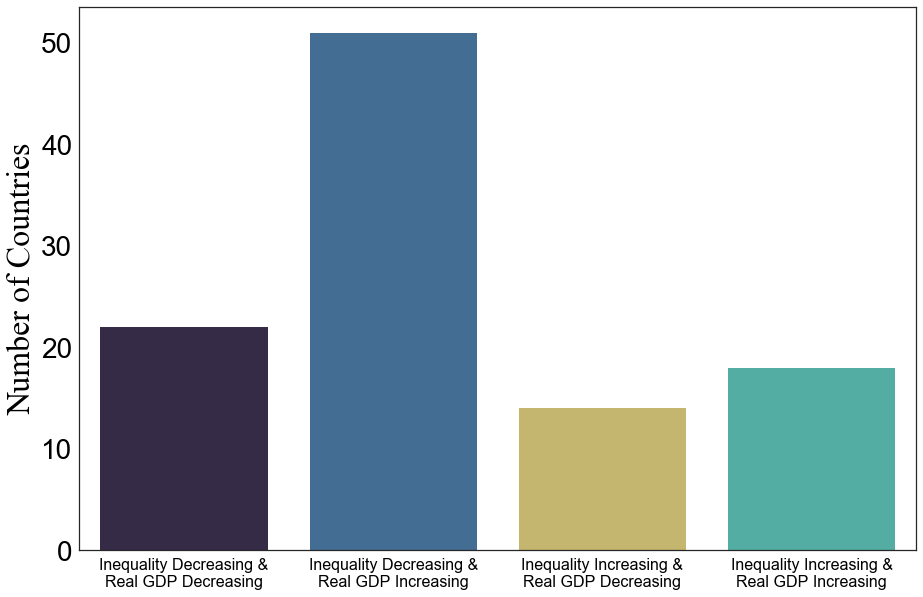

In [372]:
# Time to create a plot!
import textwrap
fig = plt.figure(figsize=(15,10))

# creating color pallete
my_pal = {"Inequality Decreasing & Real GDP Decreasing": "#35264c", 
          "Inequality Decreasing & Real GDP Increasing": "#366da0", 
          "Inequality Increasing & Real GDP Decreasing":"#d2c060", 
          "Inequality Increasing & Real GDP Increasing":"#44bcad"}

ax = sns.barplot(data=gini_gdp_rate_plot1, x="trend_label", y="trend", palette = my_pal)

ax.set_title('')

# Create a scatterplot using one of our team's colors for the plots
# plt.bar(x = gini_gdp_rate_plot.trend_label, height = 0, y = gini_gdp_rate_plot.gini_trend)
# ax = gini_gdp_rate_plot.plot.bar(x = 'trend_label', y= 'trend', rot=0)
# plt.bar(x = None, y = 'trend_label', height = None)

# # Create the title and change the font and font size
# plt.title("Country's Gini & GDP: 10 yr Rate Comparison", fontdict={'fontsize':34}, color="k",
#             fontname="Times New Roman")

# # Update the x and y labels
plt.xlabel('')
plt.ylabel("Number of Countries", fontsize = 32, color="k", fontname="Times New Roman")

# Update the tick marks
plt.xticks(fontsize=16, color="grey")
plt.yticks(fontsize=28, color="grey")
plt.tick_params(color='grey', labelcolor='k')
ax.set_xticklabels([textwrap.fill(e, 24) for e in gini_gdp_rate_plot1['trend_label'].head()])

# ax.set_xticklabels([textwrap.fill(gini_gdp_rate_plot1['trend_label'].head(n=10)[i], width) for i in range(10)])

# # Update the background style
sns.set(style = 'white')

pass